In [208]:
import pandas as pd
import matplotlib as mt

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)


#### Create a chart similar to `examples/Figure_1.png`, where we show the counts of good and bad outcomes for the `cholesterol`, `gluc`, `alco`, `active`, and `smoke` variables for patients with cardio=1 and cardio=0 in different panels.

In [209]:
df = pd.read_csv("./medical_examination.csv")
df_original = pd.read_csv("./medical_examination.csv")

In [210]:
df.shape

(70000, 13)

In [211]:
x = ['cholesterol', 'gluc', 'alco', 'active', 'smoke', 'cardio']

In [212]:
subset = df.loc[:, x]

In [213]:
subset.head()

,cholesterol,gluc,alco,active,smoke,cardio
0,1,1,0,1,0,0
1,3,1,0,1,0,1
2,3,1,0,0,0,1
3,1,1,0,1,0,1
4,1,1,0,0,0,0


In [214]:
subset_groupby = subset.groupby(df['cardio'])

In [215]:
subset_groupby.size()

cardio
0    35021
1    34979
dtype: int64

In [216]:
cardio_one = subset_groupby.get_group(1)
cardio_zero = subset_groupby.get_group(0)

In [217]:
%matplotlib inline

* Add an `overweight` column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [218]:
overweight = df["weight"] / ((df["height"]/100) **2)    

In [219]:
overweight = overweight.map( lambda x:  1 if x > 25 else 0 )

In [220]:
df['overweight'] = overweight

In [221]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


- Normalize the data by making 0 always good and 1 always bad. If the value of `cholesterol` or `gluc` is 1, make the value 0. If the value is more than 1, make the value 1.

In [222]:
df['cholesterol'] =  np.where(df['cholesterol'] == 1, 0, 1)

In [223]:
df['gluc'] =  np.where(df['gluc'] == 1, 0, 1)

In [224]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


- Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's `catplot()`. The dataset should be split by 'Cardio' so there is one chart for each `cardio` value. The chart should look like `examples/Figure_1.png`.

Pandas melt() function is used to change the DataFrame format from wide to long. It’s used to create a specific format of the DataFrame object where one or more columns work as identifiers. All the remaining columns are treated as values and unpivoted to the row axis and only two columns – variable and value.

1. Pandas melt() Example
The use of melt() function is more clear when looked through an example.


```python

import pandas as pd

d1 = {"Name": ["Pankaj", "Lisa", "David"], "ID": [1, 2, 3], "Role": ["CEO", "Editor", "Author"]}

df = pd.DataFrame(d1)

print(df)

df_melted = pd.melt(df, id_vars=["ID"], value_vars=["Name", "Role"])

print(df_melted)

```

In [225]:
value = ['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke']

df_categorical =  pd.melt(df, id_vars = ['cardio'], value_vars = value)

In [230]:
df_categorical.head()

,cardio,variable,value,total
0,0,active,1,1
1,1,active,1,1
2,1,active,0,1
3,1,active,1,1
4,0,active,0,1


In [229]:
df_categorical['total'] = 1
df_categorical.head()

,cardio,variable,value,total
0,0,active,1,1
1,1,active,1,1
2,1,active,0,1
3,1,active,1,1
4,0,active,0,1


In [233]:
group = df_categorical.groupby(['cardio', 'variable', 'value'], as_index = False).count()
group.shape

(24, 4)

In [234]:

df_categorical['total'] = group
df_categorical.shape

(420000, 4)

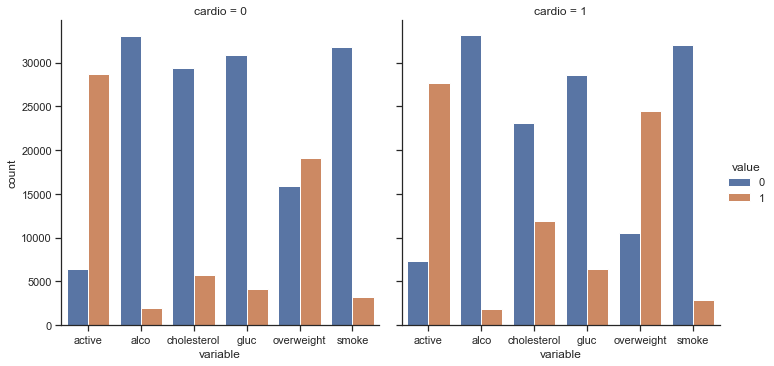

In [235]:


fig = sns.catplot(x="variable", hue="value",
            col="cardio",
            kind="count", data=df_categorical)

In [236]:
fig.savefig('catplot.png')

- Clean the data. Filter out the following patient segments that represent incorrect data:

    - diastolic pressure is higher than systolic (Keep the correct data with `(df['ap_lo'] <= df['ap_hi'])`)
    - height is less than the 2.5th percentile (Keep the correct data with `(df['height'] >= df['height'].quantile(0.025))`)
    - height is more than the 97.5th percentile
    - weight is less than the 2.5th percentile
    - weight is more than the 97.5th percentile

In [237]:
df_pressure =  df[ df['ap_lo'] <= df['ap_hi']]
df_pressure.shape

(68766, 14)

In [238]:
df['height'].quantile(0.025)

150.0

In [239]:
df_pres_height =  df[ df['height'] >= df['height'].quantile(0.025) ]
df_pressure.shape

(68766, 14)

In [240]:
df['height'].quantile(0.975)

180.0

In [241]:
df_pres_height =  df[ df['height'] <= df['height'].quantile(0.975) ]
df_pressure.shape

(68766, 14)

In [242]:
df_pres_h_w =  df[ df['weight'] >= df['weight'].quantile(0.025) ]
df_pressure.shape

(68766, 14)

In [243]:
df_pres_h_w =  df[ df['weight'] <= df['weight'].quantile(0.975) ]
df_pressure.shape

(68766, 14)

In [244]:
df_heat = df_pres_h_w.dropna()
df_pres_h_w .shape

(68387, 14)

In [258]:
 df_heat = df[ 
    (df['ap_lo'] <= df['ap_hi']) &
    (df['height'] >= df['height'].quantile(0.025)) &
    (df['height'] <= df['height'].quantile(0.975)) &
    (df['weight'] >= df['weight'].quantile(0.025)) &
    (df['weight'] <= df['weight'].quantile(0.975) )
  ]

- Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's `heatmap()`. Mask the upper triangle. The chart should look like `examples/Figure_2.png`.

In [245]:
corr = df_heat.corr?

Signature: df_heat.corr(method='pearson', min_periods=1)
Docstring:
Compute pairwise correlation of columns, excluding NA/null values.

Parameters
----------
method : {'pearson', 'kendall', 'spearman'} or callable
    * pearson : standard correlation coefficient
    * kendall : Kendall Tau correlation coefficient
    * spearman : Spearman rank correlation
    * callable: callable with input two 1d ndarrays
        and returning a float
        .. versionadded:: 0.24.0

min_periods : int, optional
    Minimum number of observations required per pair of columns
    to have a valid result. Currently only available for pearson
    and spearman correlation

Returns
-------
y : DataFrame

See Also
--------
DataFrame.corrwith
Series.corr

Examples
--------
>>> histogram_intersection = lambda a, b: np.minimum(a, b
... ).sum().round(decimals=1)
>>> df = pd.DataFrame([(.2, .3), (.0, .6), (.6, .0), (.2, .1)],
...                   columns=['dogs', 'cats'])
>>> df.corr(method=histogram_intersectio

In [ ]:
corr = df_heat.corr

In [246]:
corr = df_heat.corr

In [247]:
corr = df_heat.corr

In [248]:
corr = df_heat.corr

In [249]:
corr = df_heat.corr(method ='pearson')
corr

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.003120,0.002321,-0.004658,-0.003559,0.003414,-0.002585,0.003941,0.000886,-0.003598,0.001080,0.003494,0.003029,-0.001284
age,0.003120,1.000000,-0.021693,-0.081044,0.065266,0.020703,0.018661,0.131435,0.088171,-0.045043,-0.028798,-0.010400,0.241494,0.093900
gender,0.002321,-0.021693,1.000000,0.493498,0.165414,0.005701,0.014955,-0.037085,-0.020268,0.338337,0.169876,0.006912,0.005299,-0.045233
height,-0.004658,-0.081044,0.493498,1.000000,0.304947,0.004879,0.005005,-0.056105,-0.025236,0.186168,0.092319,-0.005593,-0.016838,-0.128426
weight,-0.003559,0.065266,0.165414,0.304947,1.000000,0.029517,0.038265,0.128224,0.103992,0.065468,0.065371,-0.016151,0.176549,0.650793
ap_hi,0.003414,0.020703,0.005701,0.004879,0.029517,1.000000,0.015261,0.024174,0.012138,-0.001282,0.001096,0.000115,0.053637,0.020169
ap_lo,-0.002585,0.018661,0.014955,0.005005,0.038265,0.015261,1.000000,0.025398,0.012734,0.003759,0.011063,0.004340,0.063831,0.028216
cholesterol,0.003941,0.131435,-0.037085,-0.056105,0.128224,0.024174,0.025398,1.000000,0.380944,0.014381,0.041340,0.006279,0.204596,0.129348
gluc,0.000886,0.088171,-0.020268,-0.025236,0.103992,0.012138,0.012734,0.380944,1.000000,-0.002550,0.016200,-0.008318,0.089815,0.090631
smoke,-0.003598,-0.045043,0.338337,0.186168,0.065468,-0.001282,0.003759,0.014381,-0.002550,1.000000,0.341707,0.029033,-0.018151,-0.004306


In [250]:

np.triu?

Signature: np.triu(m, k=0)
Docstring:
Upper triangle of an array.

Return a copy of a matrix with the elements below the `k`-th diagonal
zeroed.

Please refer to the documentation for `tril` for further details.

See Also
--------
tril : lower triangle of an array

Examples
--------
>>> np.triu([[1,2,3],[4,5,6],[7,8,9],[10,11,12]], -1)
array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 0,  8,  9],
       [ 0,  0, 12]])
File:      ~/.local/lib/python3.6/site-packages/numpy/lib/twodim_base.py
Type:      function


In [251]:
mask = np.triu(corr)

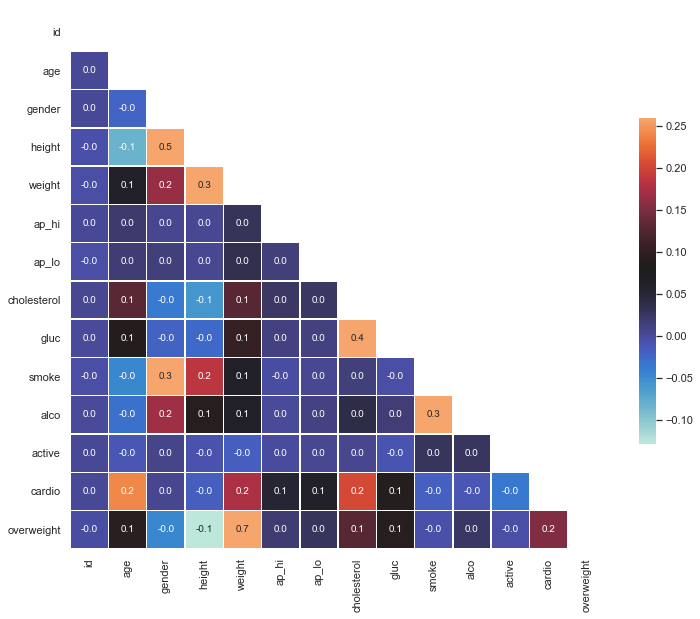

In [252]:


mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(
        corr, 
        mask=mask, 
        square=True,
        vmax = 0.26,
        linewidths=.5,
        annot=True,
        center=0.08,
        cbar_kws = {"shrink": 0.5},
        fmt = ".1f"
    )

In [253]:
fig.savefig('heatmap.png')